Exercises from:
https://ds.codeup.com/stats/hypothesis-testing-overview/
https://ds.codeup.com/stats/compare-means/

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

##### Has the network latency gone up since we switched internet service providers?

H0: Network latency has not gone up since switching internet service provers, ie the old provider was faster

Ha: The new provider has resulted in network latency going up

Accept H0 and H0 is true (True Negative):
    We accepted that network latency has not gone up and indeed network latency has not gone up with the new provider
    
Accept H0 but H0 is false (False Negative):
    We accepted that network latency has not gone up with the new provider but it actually has

Reject H0 but H0 is true (False positive):
    We rejected that network latency has not gone up with the new provider (ie we accepted that it has gone up with new provider) but actually latency has not gone up with the new provider.
    
Reject H0 and H0 is false (True Positive):
    We rejected that network latency has not gone up with the new provider (ie we accepted that it has gone up with the new provider) and latency has indeed gone up with the new provider

##### Is the website redesign any good?

H0: The old and new website versions are no better than each other, say for attracting traffic or clicks

Ha: The new website version is better than the old, say at attracting traffic/clicks

True Negative (Accept H0 and H0 is True): Accepted that the two versions of the website are no better than each other and that is true

Accept H0 but H0 is false (False negative): Accepted that the two versons are no better from each other but actually the redesign (new version) is better

Reject H0 but H0 is True (False positive): We rejected that the two versions are no better from each other ( so we thought the redesign is better) but actually they are no better from each other

Reject H0 and H0 is False (True positive): We rejected that the two versions are no better from each other (accepted that the redesign is better) and the new version is in fact better

##### Is our television ad driving more sales?

H0: The tv ad has no effect on sales - sales are the same before and after the ad

Ha: The tv ad has caused greater sales - sales are greater after the ad than before

Accept H0 and H0 is True (True negative): Accepted that the tv ad has not had any effect on sales and it hasn't

Accept H0 but H0 is False (False negative): Accepted that the tv ad has not had any effect on sales but it has in fact had an effect

Reject H0 but H0 is True (False positive): We rejected that the tv ad is not causing sales to go up but sales are not actually going up from the ad

Reject H0 and H0 is False (True positive): we rejected that the tv ad is not causing sales to go up and sales are in fact going up after all - ie the ad is causing sales to go up

### T-Test Exercises

In [4]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
from env import get_db_url
import matplotlib.pyplot as plt
from pydataset import data

1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

#### Use an independent t-test (2 sample), 2 tail

Is office 2's selling time significantly different than office 1's? <br>
$H_0$: sell time for office 2 is equal to office 1's <br>
$H_a$: sell time for office 2 is different from office 1's

In [5]:
alpha = 0.05


Verify assumptions:

    1. Independent samples: YES, two different offices
    2. Normal distribution: Not sure but there's a ttest_ind_from_stats
    3. Equal variances: not equal

In [6]:
t, p = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var=False)
t, p

(-2.7091418459143854, 0.00811206270346016)

In [7]:
print(f'The t-statistic for the two sample t-test comparing office 1 and office 2 selling time is {round(t,3)}.')
print(f'Our p-value is {round(p, 3)}.')
print(f'This means there is about a {round(p * 100, 2)}% chance that we observe the data we have.')
print(f'Our p-value is less than our alpha ({alpha}): {p < alpha}')
if p<alpha:
    print('Therefore we can reject the null hypothesis and conclude the two offices have significantly different average selling times')
else:
    print('No significant difference between offices')

The t-statistic for the two sample t-test comparing office 1 and office 2 selling time is -2.709.
Our p-value is 0.008.
This means there is about a 0.81% chance that we observe the data we have.
Our p-value is less than our alpha (0.05): True
Therefore we can reject the null hypothesis and conclude the two offices have significantly different average selling times


## Load the mpg dataset and use it to answer the following questions:

In [8]:
mpg = data('mpg')

In [9]:
mpg = mpg.assign(avg_mpg = lambda avg: (mpg.cty+mpg.hwy)/2)

# Can use harmonic mean when talking about average of different rates
mpg['hmpg'] = stats.hmean(mpg[['cty','hwy']],axis=1)

In [10]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg,hmpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,19.809524
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,22.638298
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,24.360000
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,19.809524
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0,21.272727


### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

Use an independent t-test (2 sample)

$H_0$: mpg is the same between 2008 and 1999 <br>
$H_a$: mpg is not the same between 2008 and 1999

In [11]:
alpha = 0.05

In [12]:
fe_2008 = mpg[mpg.year == 2008].avg_mpg
fe_1999 = mpg[mpg.year == 1999].avg_mpg

Median: 20.5
Mean: 20.076923076923077


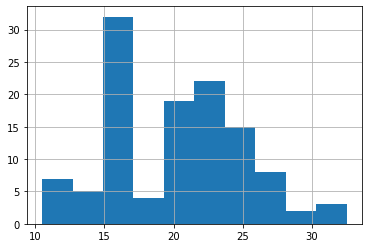

In [13]:
fe_2008.hist()
print(f"Median: {fe_2008.median()}")
print(f"Mean: {fe_2008.mean()}")

Median: 21.0
Mean: 20.22222222222222


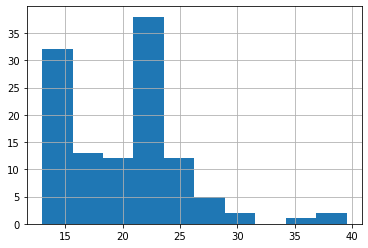

In [14]:
fe_1999.hist()
print(f"Median: {fe_1999.median()}")
print(f"Mean: {fe_1999.mean()}")

Assumptions:

    1. Normal: YES
    2. Independent: YES
    3. Variance: Close

In [15]:
fe_1999.var()

27.122605363984682

In [16]:
fe_2008.var()

24.097480106100797

In [17]:
t, p = stats.ttest_ind(fe_1999, fe_2008, equal_var = True)
t, p

(0.21960177245940962, 0.8263744040323578)

In [18]:
if p < alpha:
    print("Reject the null - there is a difference in mpg")
else:
    print("Fail to reject - no difference in mpg")


Fail to reject - no difference in mpg


### Are compact cars more fuel-efficient than the average car?

In [19]:
mpg.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class', 'avg_mpg', 'hmpg'],
      dtype='object')

Comparing observed mean to the theoretic one - one sample t test. A one-tailed test looks for a specific difference: appropriate if I only want to determine if there is a difference between groups in a specific direction, positive only or negative only. Here I'm looking for whether subset mean (compact) is greater than overall mean, so evaluate p/2 < a and t > 0

$H_0$: compact cars are no different in fuel efficiency as the average <br>
$H_a$: compact cars are more efficient than the average car

Assumptions:

    1. Normal: YES
    2. Independent: YES, or are they? Compact cars are subset of all
    3. Variance: Quite different

In [20]:
compact = mpg[mpg['class'] == 'compact'].avg_mpg

# Should use harmonic mean to be more accurate

In [21]:
compact.var()

12.442876965772433

In [22]:
mpg.avg_mpg.var()

25.50542900113715

In [23]:
t, p = stats.ttest_1samp(compact, mpg.avg_mpg.mean())

In [24]:
print(f'The t-statistic for the one sample t-test comparing compact car mpg to overall mpg is {round(t,3)}.')
print(f'The t-statistic is greater than 0: {round(t,3)>0}.')
print(f'Our p-value/2 is {p/2}.')
print(f'Our p-value/2 is less than our alpha ({alpha}): {p/2 < alpha}')
if (p/2 < alpha) and (t>0):
    print(f"We reject $H_{0}$ - compact cars are more efficient than average car")
else:
    print(f"We fail to reject \$H_{0}$- compact cars are not different in efficiency from the average car")


The t-statistic for the one sample t-test comparing compact car mpg to overall mpg is 7.897.
The t-statistic is greater than 0: True.
Our p-value/2 is 2.0992818971585668e-10.
Our p-value/2 is less than our alpha (0.05): True
We reject $H_0$ - compact cars are more efficient than average car


### Do manual cars get better gas mileage than automatic cars?

This is comparing the means of two different groups - independent t-test, 1 tail, significantly larger

In [25]:
manual = mpg[mpg.trans.str.contains('manual')].avg_mpg
automatic = mpg[mpg.trans.str.contains('auto')].avg_mpg

H0 = gas mileage is the same between manual and automatic cars <br>
Ha = manual cars get better gas mileage than automatic cars

Manual var: 26.635167464114826, median: 22.0, mean: 22.227272727272727


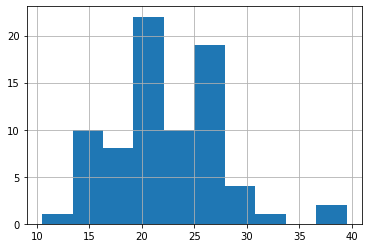

In [26]:
manual.hist()
print(f"Manual var: {manual.var()}, median: {manual.median()}, mean: {manual.mean()}")

Automatic var: 21.942777233382337, median: 19.0, mean: 19.130573248407643


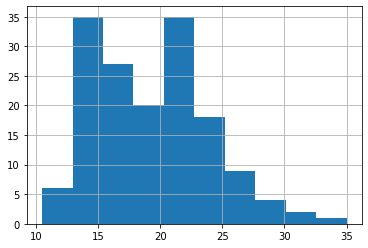

In [27]:
automatic.hist()
print(f"Automatic var: {automatic.var()}, median: {automatic.median()}, mean: {automatic.mean()}")

In [28]:
tlev, plev = stats.levene(manual, automatic)
tlev, plev

(0.20075824847529639, 0.6545276355131857)

In [29]:
if plev < 0.05:
    print("Variances not equal")
else:
    print("Variances equal")

Variances equal


Assumptions:

    1. Normal: YES
    2. Independent: YES
    3. Variance: similar enough based on levene

In [30]:
t, p = stats.ttest_ind(manual, automatic, equal_var=True)

t, p/2

(4.593437735750014, 3.5771872005728416e-06)

In [31]:
print("is p/2 < alpha? ", p / 2 < alpha)
print("is t > 0? ", t > 0)
if p / 2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
elif (p / 2 < alpha) and (t>0):
    print("We reject H0 - manual cars have higher mpg than automatic")
else:
    print("We reject $H_{0}$")


is p/2 < alpha?  True
is t > 0?  True
We reject H0 - manual cars have higher mpg than automatic


# Correlation Exercises

In [117]:
def how_correlated(r):
    """Utility function to output a qualitative measure of correlation based on r value"""
    if abs(r)<0.2:
        return "No correlation"
    elif abs(r)<0.5:
        return "Weak correlation"
    elif abs(r)<0.75:
        return "Moderate correlation"
    else:
        return "Strong correlation"

### 1. Telco Churn: 
#### Does tenure correlate with monthly charges?

In [33]:
# Read the csv file
df = pd.read_csv('Cust_Churn_Telco - Cust_Churn_Telco.csv')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='tenure'>

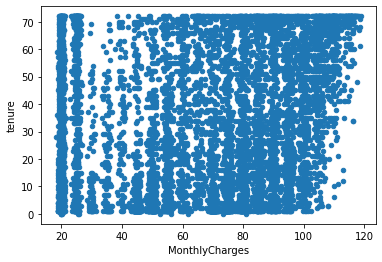

In [34]:
df.plot.scatter(y='tenure', x='MonthlyCharges')

$H_0$: there is no linear relationship between tenure and monthly charges <br>
$H_a$: there is a linear relationship between tenure and monthly charges

In [84]:
corr, p = stats.pearsonr(df.tenure, df.MonthlyCharges)
print("r: ",corr,"p: ", p)
print(how_correlated(corr))
if p < alpha:
    print("Reject the null hypothesis that there is no linear relationship between tenure and monthly charges. ")
else:
    print("Fail to reject null")

r:  0.2478998562861525 p:  4.094044991483017e-99
Weak correlation
Reject the null hypothesis that there is no linear relationship between tenure and monthly charges. 


#### Total charges? 

In [85]:
# Deal with the nulls for cases where tenure is 0 months and total charges is 0. Sets total charges to monthly charge. Perhaps should just drop the null rows. 
# Doesn't make a real difference though given the tiny percentage of rows containing nulls.
df.TotalCharges = np.where(df.TotalCharges.isna(), df.MonthlyCharges, df.TotalCharges)

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

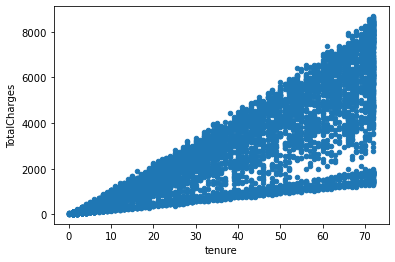

In [86]:
df.plot.scatter(x='tenure', y='TotalCharges')

In [87]:
corr, p = stats.pearsonr(df.tenure, df.TotalCharges)
print(corr,"p: ", p)
print(how_correlated(corr))
if p < alpha:
    print("Reject the null hypothesis that there is no linear relationship between tenure and total charges")
else:
    print("Fail to reject null")

0.8261642132368029 p:  0.0
Strong correlation
Reject the null hypothesis that there is no linear relationship between tenure and total charges


### What happens if you control for phone and internet service?

In [105]:
r_values = {}

In [106]:
# Phone service - there are yes and no values
for internet in df.InternetService.unique():
    for phone in df.PhoneService.unique():
        print(f"\nWith internet service: {internet}")
        print(f"With phone service: {phone}")

        iteration = df[(df.PhoneService == phone) & (df.InternetService == internet)]
        
        if len(iteration)>0:
            corr, p = stats.pearsonr(iteration.tenure, iteration.TotalCharges)

            print(corr,"p: ", p)
            print(how_correlated(corr))

            if p < alpha:
                print("Reject the null hypothesis that there is no linear relationship between tenure and total charges")
            else:
                print("Fail to reject null")
        else:
            print(f"No values with phone service = {phone} and internet service = {internet}")
        
        r_values[(internet,phone)] = corr
        print("------")


With internet service: DSL
With phone service: No
0.9535382000965719 p:  0.0
Strong correlation
Reject the null hypothesis that there is no linear relationship between tenure and total charges
------

With internet service: DSL
With phone service: Yes
0.9705805668734967 p:  0.0
Strong correlation
Reject the null hypothesis that there is no linear relationship between tenure and total charges
------

With internet service: Fiber optic
With phone service: No
No values with phone service = No and internet service = Fiber optic
------

With internet service: Fiber optic
With phone service: Yes
0.9853093528070647 p:  0.0
Strong correlation
Reject the null hypothesis that there is no linear relationship between tenure and total charges
------

With internet service: No
With phone service: No
No values with phone service = No and internet service = No
------

With internet service: No
With phone service: Yes
0.9815510648755311 p:  0.0
Strong correlation
Reject the null hypothesis that there 

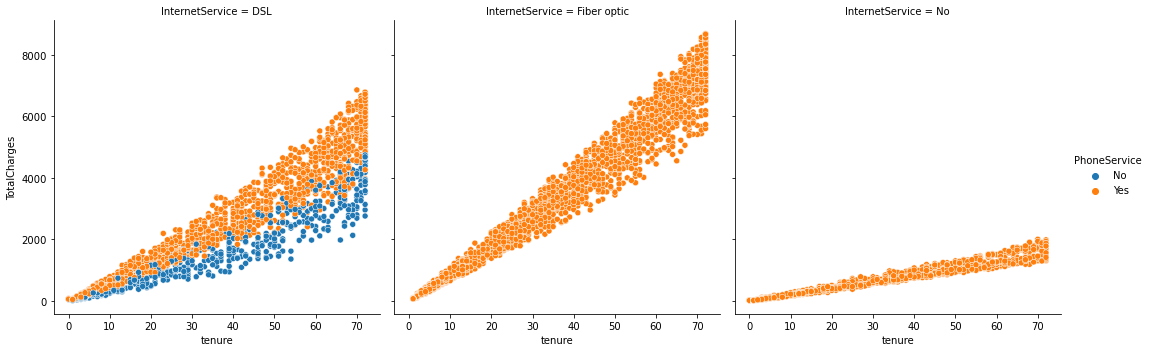

In [82]:
sns.relplot(data = df, x = 'tenure', y='TotalCharges', hue = 'PhoneService', col = 'InternetService')

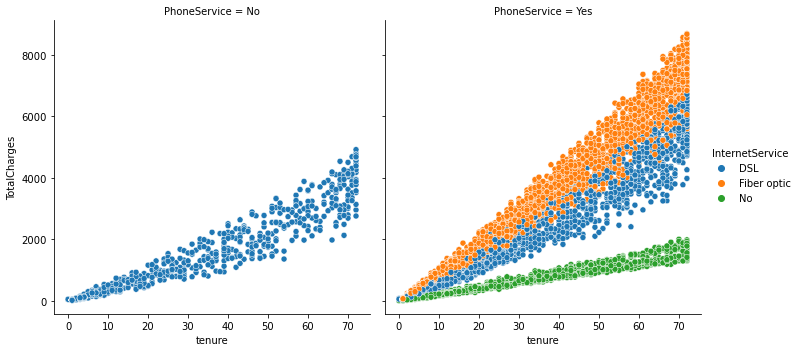

In [64]:
sns.relplot(data=df, x = 'tenure', y='TotalCharges', hue = 'InternetService', col = 'PhoneService')

In [122]:
r_values

{('DSL', 'No'): 0.9535382000965719,
 ('DSL', 'Yes'): 0.9705805668734967,
 ('Fiber optic', 'No'): 0.9705805668734967,
 ('Fiber optic', 'Yes'): 0.9853093528070647,
 ('No', 'No'): 0.9853093528070647,
 ('No', 'Yes'): 0.9815510648755311}

In [126]:
rdf = pd.DataFrame.from_dict(r_values,orient='index',columns=['r_value'])

In [127]:
rdf

,r_value
"(DSL, No)",0.953538
"(DSL, Yes)",0.970581
"(Fiber optic, No)",0.970581
"(Fiber optic, Yes)",0.985309
"(No, No)",0.985309
"(No, Yes)",0.981551


### 2. Use Employees: Is there a relationship between how long an employee has been with the company and their salary?

$H_0$: there is no linear relationship between time at company and salary <br>
$H_a$: there is a linear relationship between time at company and salary

In [66]:
# Using every employee's final salary (current and former employees)
# NOTE doesn't look the database has values between early 2000s and 2022 so answers won't make much sense
# sql = """
# SELECT 
#     g.emp_no, 
#     hire_date,
#     IF(max_to_date>CURDATE(), CURDATE(), max_to_date) as actual_max_to_date,
#     s.salary, 
#     DATEDIFF(max_to_date, hire_date) AS time_at_company
# FROM
# (SELECT emp_no, hire_date, MAX(to_date) as max_to_date
# FROM employees
# JOIN salaries
# USING (emp_no)
# GROUP BY emp_no, hire_date) as g
# JOIN salaries as s
# ON g.emp_no = s.emp_no and g.max_to_date = s.to_date;
#       """
# emp_sal = pd.read_sql(sql, get_db_url('employees'))

In [67]:
# Gets current employees only
sql = """
SELECT emp_no, salary, hire_date, to_date, DATEDIFF(to_date,  hire_date) AS days_at_company
FROM employees
JOIN salaries
USING (emp_no)
WHERE to_date>CURDATE();
"""
emp_sal = pd.read_sql(sql, get_db_url('employees'))

In [68]:
emp_sal.head()

,emp_no,salary,hire_date,to_date,days_at_company
0,10001,88958,1986-06-26,9999-01-01,2926512
1,10002,72527,1985-11-21,9999-01-01,2926729
2,10003,43311,1986-08-28,9999-01-01,2926449
3,10004,74057,1986-12-01,9999-01-01,2926354
4,10005,94692,1989-09-12,9999-01-01,2925338


In [108]:
corr, p = stats.pearsonr(emp_sal.days_at_company, emp_sal.salary)
corr, p

(0.3064625613186087, 0.0)

In [109]:
print(how_correlated(corr))
if p < alpha:
    print("Reject the null hypothesis that there is no linear relationship between days at company and salary")
else:
    print("Fail to reject null")

Weak correlation
Reject the null hypothesis that there is no linear relationship between days at company and salary


<AxesSubplot:xlabel='days_at_company', ylabel='salary'>

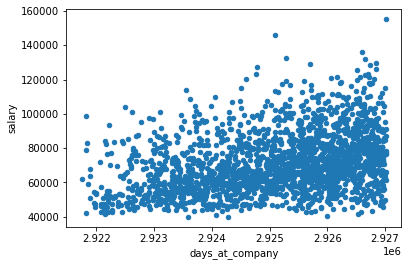

In [113]:
emp_sal.sample(2000).plot(x = 'days_at_company', y = 'salary', kind = 'scatter')

### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

$H_0$: there is no linear relationship between time at company and number of titles <br>
$H_a$: there is a linear relationship between time at company and number of titles

In [114]:
# Gets current employees only, their number of titles and days at company
query = """
SELECT emp_no, num_titles, DATEDIFF(CURDATE(), hire_date) AS days_at_company
FROM
(SELECT emp_no, COUNT(title) AS num_titles
FROM titles
WHERE emp_no IN
(SELECT emp_no
 FROM titles 
)
GROUP BY emp_no) AS title_nums
JOIN employees
USING (emp_no);
"""
emp_titles = pd.read_sql(query, get_db_url('employees'))

In [115]:
emp_titles.head()

,emp_no,num_titles,days_at_company
0,10001,1,13025
1,10002,1,13242
2,10003,1,12962
3,10004,2,12867
4,10005,2,11851


In [116]:
corr, p = stats.pearsonr(emp_titles.days_at_company, emp_titles.num_titles)
corr, p

(0.2665989299136427, 0.0)

In [75]:
print(how_correlated(corr))
if p < alpha:
    print("Reject the null hypothesis that there is no linear relationship between days at company and number of titles")
else:
    print("Fail to reject null")

Weak correlation
Reject the null hypothesis that there is no linear relationship between days at company and number of titles


### 3. Use the sleepstudy data. Is there a relationship between days and reaction time?

In [76]:
sleep = data('sleepstudy')

In [77]:
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [118]:
corr, p = stats.pearsonr(sleep.Days, sleep.Reaction)
print("r: ", corr, "p: ", p)
print(how_correlated(corr))
if p < alpha:
    print("Reject the null hypothesis that there is no linear relationship between days and reaction time")
else:
    print("Fail to reject null")

r:  0.5352302262650253 p:  9.894096322214812e-15
Moderate correlation
Reject the null hypothesis that there is no linear relationship between days and reaction time


## Chi square

### 1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.


H0: Using a macbook and being a codeup student are independent of each other <br>
Ha: There is a relationship between being a codeup student and using a macbook

In [128]:
index = ['Uses a Macbook', 'Does not use a Macbook']
columns = ['Codeup Student', 'Not Codeup Student']
observed = pd.DataFrame([[49, 20],[1, 30]], index = index, columns = columns)
n = observed.values.sum()
alpha = 0.05

In [129]:
observed

,Codeup Student,Not Codeup Student
Uses a Macbook,49,20
Does not use a Macbook,1,30


In [131]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

if p<alpha:
    print("Reject null hypothesis - not independent")
else:
    print("Fail to reject null hypothesis")

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34.5 34.5]
 [15.5 15.5]]
---

chi^2 = 36.6526
p     = 0.0000
Reject null hypothesis - not independent


### 2. Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

### a. First 2 categorical variables chosen: cyl and class

In [221]:
# class and cyl
n = mpg.shape[0]

class_proportions = mpg["class"].value_counts() / n
cyl_proportions = mpg.cyl.value_counts() / n 

In [222]:
class_proportions

suv           0.264957
compact       0.200855
midsize       0.175214
subcompact    0.149573
pickup        0.141026
minivan       0.047009
2seater       0.021368
Name: class, dtype: float64

In [223]:
cyl_proportions

4    0.346154
6    0.337607
8    0.299145
5    0.017094
Name: cyl, dtype: float64

In [264]:
df = pd.DataFrame(np.outer(class_proportions,cyl_proportions), index = class_proportions.index, columns = cyl_proportions.index)

In [265]:
df *= n

In [266]:
# Expected proportions
expected = df
expected

,4,6,8,5
suv,21.461538,20.931624,18.547009,1.059829
compact,16.269231,15.867521,14.059829,0.803419
midsize,14.192308,13.841880,12.264957,0.700855
subcompact,12.115385,11.816239,10.470085,0.598291
pickup,11.423077,11.141026,9.871795,0.564103
minivan,3.807692,3.713675,3.290598,0.188034
2seater,1.730769,1.688034,1.495726,0.085470


In [227]:
# Observed proportions
observed = pd.crosstab(mpg["class"],mpg.cyl)
observed

cyl,4,5,6,8
class,,,,
2seater,0,0,0,5
compact,32,2,13,0
midsize,16,0,23,2
minivan,1,0,10,0
pickup,3,0,10,20
subcompact,21,2,7,5
suv,8,0,16,38


In [245]:
chi2 = ((observed - expected)**2 / expected).values.sum()
chi2


138.02824375973245

In [246]:
nrows, ncols = observed.shape

degrees_of_freedom = (nrows - 1) * (ncols - 1)


In [247]:
p = stats.chi2(degrees_of_freedom).sf(chi2)


1.5351076620141742e-20

In [136]:
if p<alpha:
    print("With this low of a p value we can reject the null hypothesis, ie I'm confident these two groups are not independent from each other")

With this low of a p value we can reject the null hypothesis, ie I'm confident these two groups are not independent from each other


### The easy way...

In [228]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [229]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 0  0  0  5]
 [32  2 13  0]
 [16  0 23  2]
 [ 1  0 10  0]
 [ 3  0 10 20]
 [21  2  7  5]
 [ 8  0 16 38]]
---
Expected

[[ 1  0  1  1]
 [16  0 15 14]
 [14  0 13 12]
 [ 3  0  3  3]
 [11  0 11  9]
 [12  0 11 10]
 [21  1 20 18]]
---

chi^2 = 138.0282
p     = 0.0000


In [139]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


### b. Second two categorical variables: fl (fuel) and drive

In [230]:
# class and cyl
n = mpg.shape[0]

drive_proportions = mpg.drv.value_counts() / n
fl_proportions = mpg.fl.value_counts() / n 

In [231]:
drive_proportions

f    0.452991
4    0.440171
r    0.106838
Name: drv, dtype: float64

In [232]:
fl_proportions

r    0.717949
p    0.222222
e    0.034188
d    0.021368
c    0.004274
Name: fl, dtype: float64

In [233]:
df = pd.DataFrame(np.outer(drive_proportions,fl_proportions), index = drive_proportions.index, columns = fl_proportions.index)

In [234]:
df *= n

In [235]:
# Expected proportions
expected = df
expected

,r,p,e,d,c
f,76.102564,23.555556,3.623932,2.264957,0.452991
4,73.948718,22.888889,3.521368,2.200855,0.440171
r,17.948718,5.555556,0.854701,0.534188,0.106838


In [236]:
# Observed proportions
observed = pd.crosstab(mpg.drv,mpg.fl)
observed

fl,c,d,e,p,r
drv,,,,,
4,0,2,6,20,75
f,1,3,1,25,76
r,0,0,1,7,17


In [237]:
chi2 = ((observed - expected)**2 / expected).values.sum()
chi2


6.56182935126789

In [238]:
nrows, ncols = observed.shape

degrees_of_freedom = (nrows - 1) * (ncols - 1)


In [239]:
p = stats.chi2(degrees_of_freedom).sf(chi2)
p

0.5845579584206684

In [240]:
if p > alpha:
    print("With this high of a p value we fail to reject the null hypothesis, ie these two groups are independent of each other")
else:
    print("Reject null hypothesis")

With this high of a p value we fail to reject the null hypothesis, ie these two groups are independent of each other


In [241]:
# The easy way...
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [242]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 0  2  6 20 75]
 [ 1  3  1 25 76]
 [ 0  0  1  7 17]]
---
Expected

[[ 0  2  3 22 73]
 [ 0  2  3 23 76]
 [ 0  0  0  5 17]]
---

chi^2 = 6.5618
p     = 0.5846


In [243]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


### 3. Use the data from the employees database to answer these questions:

#### Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [211]:
query = """
SELECT *
FROM employees
JOIN dept_emp
USING (emp_no)
JOIN departments
USING (dept_no)
WHERE to_date>CURDATE()
"""

In [212]:

dept_emp = pd.read_sql(query,get_db_url('employees'))

In [213]:
departments_of_interest = dept_emp[dept_emp.dept_name.str.contains("Sales|Marketing")]

In [244]:
observed = pd.crosstab(departments_of_interest.dept_name, departments_of_interest.gender)

In [245]:
observed

gender,F,M
dept_name,,
Marketing,5864,8978
Sales,14999,22702


In [246]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [247]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 5864  8978]
 [14999 22702]]
---
Expected

[[ 5893  8948]
 [14969 22731]]
---

chi^2 = 0.3240
p     = 0.5692


In [248]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


#### Is an employee's gender independent of whether or not they are or have been a manager?

In [219]:
query = """
SELECT gender, 
   	   emp_no,
   	   IF(emp_no IN (SELECT emp_no FROM dept_manager),"YES","NO") AS is_manager
FROM employees;
"""

In [220]:
mgr_gender = pd.read_sql(query, get_db_url('employees'))

In [221]:
mgr_gender.is_manager.value_counts()

NO     300000
YES        24
Name: is_manager, dtype: int64

In [222]:
observed = pd.crosstab(mgr_gender.is_manager, mgr_gender.gender)

In [223]:
observed

gender,F,M
is_manager,,
NO,120038,179962
YES,13,11


In [224]:
# The easy way...
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [225]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[120038 179962]
 [    13     11]]
---
Expected

[[120041 179958]
 [     9     14]]
---

chi^2 = 1.4567
p     = 0.2275


In [226]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis
